In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sy

In [2]:
import pandas as pd

In [3]:
#Question 6

In [4]:
gauss = np.loadtxt("C:\\Users\\Joe\\Desktop\\Tufts Fall 2022\\MATH 123\\HW3\\gaussian_noisy.csv", delimiter=",")

In [5]:
gauss.shape

(10000, 2)

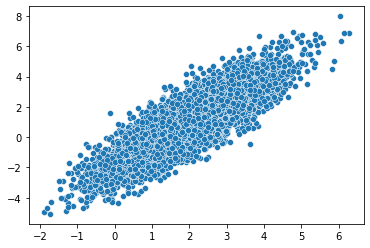

In [6]:
sns.scatterplot(x=gauss[:,0], y = gauss[:,1])
plt.show;

In [7]:
##6.a.

In [8]:
def center(test):
    new_arr = np.copy(test)
    for col in range(0,new_arr.shape[1]):
        mean = new_arr[:,col].mean()
        for i in range(0,len(new_arr)):
            new_arr[i,col] = new_arr[i,col]-mean
    return new_arr

In [9]:
def my_pca(mydata):
    cdata = center(mydata)
    #Next computer covariance matrix
    cov_mat = (1/len(cdata))*np.dot(cdata.transpose(),cdata)
    eig_vals = np.linalg.eig(cov_mat)[0] #eigenvalues un sorted
    eig_vecs = np.linalg.eig(cov_mat)[1] #eigenvectors un sorted
    eig_val_indices = (-eig_vals).argsort() #find correct order of eigs
    #print(eig_vecs)
    eig_vecs = eig_vecs[eig_val_indices] #reorder to be largest eigenval with its vector first
    eig_vals = eig_vals[eig_val_indices] #same
    eig_vecs = eig_vecs*-1

    return eig_vecs, eig_vals, eig_val_indices   #keep track of each item



In [10]:
gauss_comps, gauss_vars, gauss_var_indices = my_pca(gauss)
print(gauss_comps)
gauss_vars

[[-0.4989128   0.86665219]
 [ 0.86665219  0.4989128 ]]


array([3.86620058, 0.24950899])

In [11]:
#% Variance  for first PC
gauss_vars[0]/sum(gauss_vars)

0.9393764351535896

In [12]:
#% Variance  for second PC
gauss_vars[1]/sum(gauss_vars)

0.060623564846410447

In [13]:
gauss_var_indices

array([1, 0], dtype=int64)

In [14]:
#summarize and explain observations from part B -- see my notebook

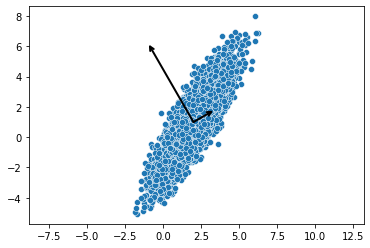

In [15]:
#these are the right vectors but lingalg.eigs normalizes them in a random way so I can't systematically get them
#to point in the right direction! Would be cool if you know how to fix this! but the sklearn PCA does it
#right so its NBD

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
sns.scatterplot(x=gauss[:,0], y = gauss[:,1])
for length, vector in zip(gauss_vars, gauss_comps):
    v = vector * 3 * np.sqrt(length)
    draw_vector(gauss.mean(axis=0), gauss.mean(axis=0) + v)
plt.axis('equal');

In [16]:
gauss_pca_check_model = PCA(n_components=2)

In [17]:
gauss_pca_check_model.fit(gauss)

PCA(n_components=2)

In [18]:
gauss_pca_check_model.components_

array([[ 0.4989128 ,  0.86665219],
       [-0.86665219,  0.4989128 ]])

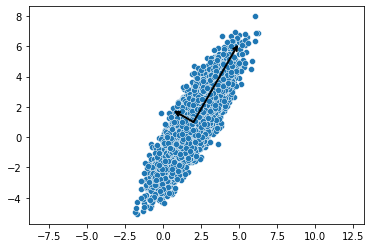

In [19]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
sns.scatterplot(x=gauss[:,0], y = gauss[:,1])
for length, vector in zip(gauss_pca_check_model.explained_variance_, gauss_pca_check_model.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(gauss.mean(axis=0), gauss.mean(axis=0) + v)
plt.axis('equal');

In [20]:
uni = np.loadtxt("C:\\Users\\Joe\\Desktop\\Tufts Fall 2022\\MATH 123\\HW3\\uniform_noisy.csv", delimiter=",")

In [21]:
uni.shape

(500, 2)

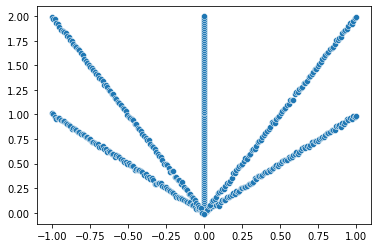

In [22]:
sns.scatterplot(x=uni[:,0],y=uni[:,1])
plt.show;

In [23]:
uni_comps, uni_vals, uni_val_indices = my_pca(uni)

In [24]:
uni_comps

array([[ 0.00283345,  0.99999599],
       [ 0.99999599, -0.00283345]])

In [25]:
uni_vals

array([0.29868591, 0.26801322])

In [26]:
#percentage variance for the first PC
uni_vals[0]/sum(uni_vals)

0.5270625856169509

In [27]:
#percentage variance for second PC
uni_vals[1]/sum(uni_vals)

0.4729374143830491

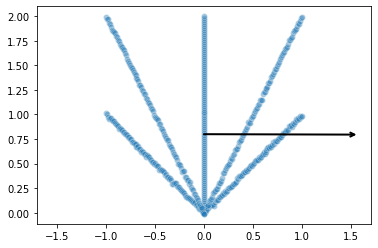

In [28]:
# plot data
sns.scatterplot(x=uni[:,0], y = uni[:,1], alpha = .4)
for length, vector in zip(uni_vals, uni_comps):
    v = vector * 3 * np.sqrt(length)
    draw_vector(uni.mean(axis=0), uni.mean(axis=0) + v)
plt.axis('equal');

In [29]:
 #Explain and summarize observations for part C -- see my notebook

In [30]:
#Question 7

In [31]:
data = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\MATH 123\\HW3\\data_067.csv", delimiter=",")

In [32]:
data.shape

(21072, 784)

In [33]:
model = PCA(n_components=2, svd_solver='arpack', random_state=1)

In [34]:
model.fit(data)

PCA(n_components=2, random_state=1, svd_solver='arpack')

In [35]:
model.components_.shape

(2, 784)

In [36]:
test_values = model.transform(data)

In [37]:
test_values.shape

(21072, 2)

In [38]:
V = model.components_.transpose()
V_t = model.components_

In [39]:
V_t.shape

(2, 784)

In [40]:
approximation = (data-model.mean_).dot(V)

In [41]:
test_values[0]

array([ 4.08272393, -1.00021799])

In [42]:
approximation[0]

array([ 4.08272393, -1.00021799])

In [43]:
labels = np.loadtxt('C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\MATH 123\\HW3\\label_067.csv', delimiter=",")

In [44]:
labels_a = labels.reshape(21072,1)

In [45]:
full_data = np.hstack((data,labels_a))

In [46]:
low_d_data = pd.DataFrame(approximation)
low_d_data.columns = ['PC1','PC2']
low_d_data.head()


,PC1,PC2
0,4.082724,-1.000218
1,-0.139325,3.857244
2,-2.485433,-2.544350
3,-1.227092,1.991623
4,4.301781,-1.897811


In [47]:
low_d_data['label'] = labels.tolist()
low_d_data.head()

,PC1,PC2,label
0,4.082724,-1.000218,0.0
1,-0.139325,3.857244,6.0
2,-2.485433,-2.544350,7.0
3,-1.227092,1.991623,6.0
4,4.301781,-1.897811,0.0


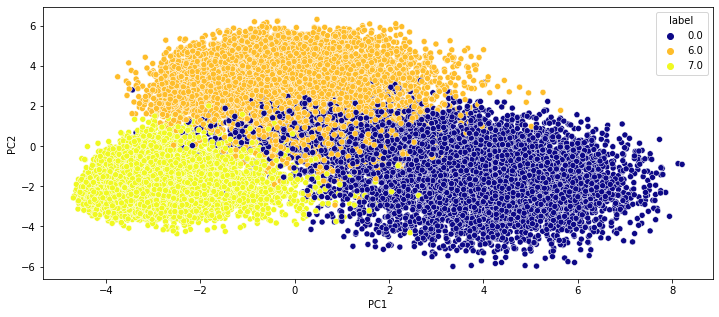

In [48]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=low_d_data,x ='PC1', y='PC2', hue='label', palette='plasma') 
plt.show;

This seems like a good representation of the data. Each label seems to have its own general area in relation to the two PCs, meaning that the components are doing a good job explaining the variance between the 3 types of labels.

In [49]:
approximation.shape
labels_a.shape

(21072, 1)

In [50]:
approx_withlab = np.hstack((approximation,labels_a)) # add the labels to our low-dim data

In [51]:
sevens_pca_indicies = np.where(approx_withlab[:,2] == 7)[0] #find the indicies of where they are 7

In [52]:
sevens_pca = np.zeros(7293*2).reshape(7293,2) #create a new array with just these
for i in range(0,len(sevens_pca_indicies)):
    sevens_pca[i] = approximation[sevens_pca_indicies[i]]

In [53]:
sevens_full_indices = np.where(full_data[:,784] == 7) #find in the full data our indicies jsut 7s

In [54]:
sevens_full_indices = sevens_full_indices[0] #

In [55]:
sevens_full = np.zeros(7293*785).reshape(7293,785) #create an array with just the 7s and label
for i in range(0,len(sevens_full_indices)):
    sevens_full[i] = full_data[sevens_full_indices[i]]


In [56]:
sevens_full.shape

(7293, 785)

In [57]:
sevens_full_nolab = sevens_full[:,0:784] #remove the label

In [58]:
sevens_full_nolab.shape

(7293, 784)

In [59]:
print(V.shape)
print(sevens_pca.shape)

(784, 2)
(7293, 2)


In [60]:
seven_projection = model.inverse_transform(sevens_pca) #create the projection of the low dim data

In [61]:
np.sum((sevens_full_nolab-seven_projection)**2,axis=1).mean() #calculate error

35.711489319847075

In [62]:
'''
Part b
'''

'\nPart b\n'

In [63]:
components = np.arange(0,310,10) #array of each component to tets 
components[0] = 1
components

array([  1,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300])

In [64]:
error_list = np.arange(0,31)*0 #empty array to store our errors
error_list.shape

(31,)

In [65]:
b_data = sevens_full[:,:784]  #creating new data frame because old naming conventions were terrible
b_data.shape

(7293, 784)

In [66]:
index = 0
for comps in components:
    model = PCA(n_components=comps, svd_solver='arpack', random_state=1)
    model.fit(b_data)
    b_data_pcas = model.transform(b_data)
    projection = model.inverse_transform(b_data_pcas)
    error_item = np.sum((b_data - projection)**2, axis = 1).mean()
    error_list[index] = error_item
    index += 1



In [67]:
error_data = pd.DataFrame([components,error_list])

In [68]:
error_data = error_data.transpose()

In [69]:
error_data.columns = ['Components','Error']


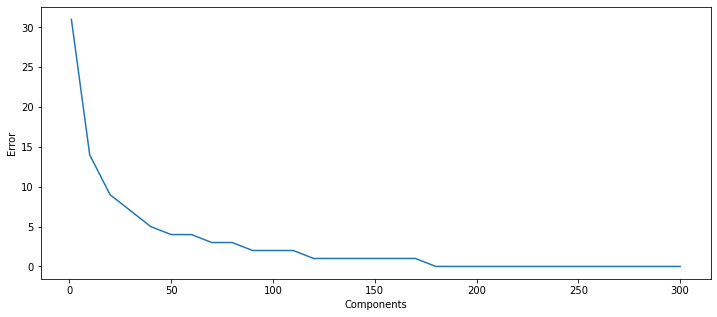

In [70]:
plt.figure(figsize=(12,5))
sns.lineplot(data=error_data, x='Components', y='Error')
plt.show;

From this chart, we can see that with more PCs, the reconstruction error  is lower since we are capturing more of the variability in the original data. Based on our results, it seems like around 180 components is enough to capture virtually all the variance.